In [ ]:
# 단계 1: 폰트 설치
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설치

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [ ]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설치

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

crime_data = pd.read_csv('범죄_지역별_통계.csv', encoding='euc-kr')

# 데이터 확인
print(crime_data.head())

  범죄대분류  범죄중분류   서울   부산   대구   인천   광주   대전   울산  세종  도시이외
0  강력범죄   살인기수   67   20   13   17   11    8   12   2    30
1  강력범죄  살인미수등   96   41   23   34    7   16   11   1    44
2  강력범죄     강도  274  161   60  103   44   64   29   0    65
3  강력범죄     강간  969  383  216  304  216  181  132   3   328
4  강력범죄   유사강간  118   24   21   35   17   14   10   1    33


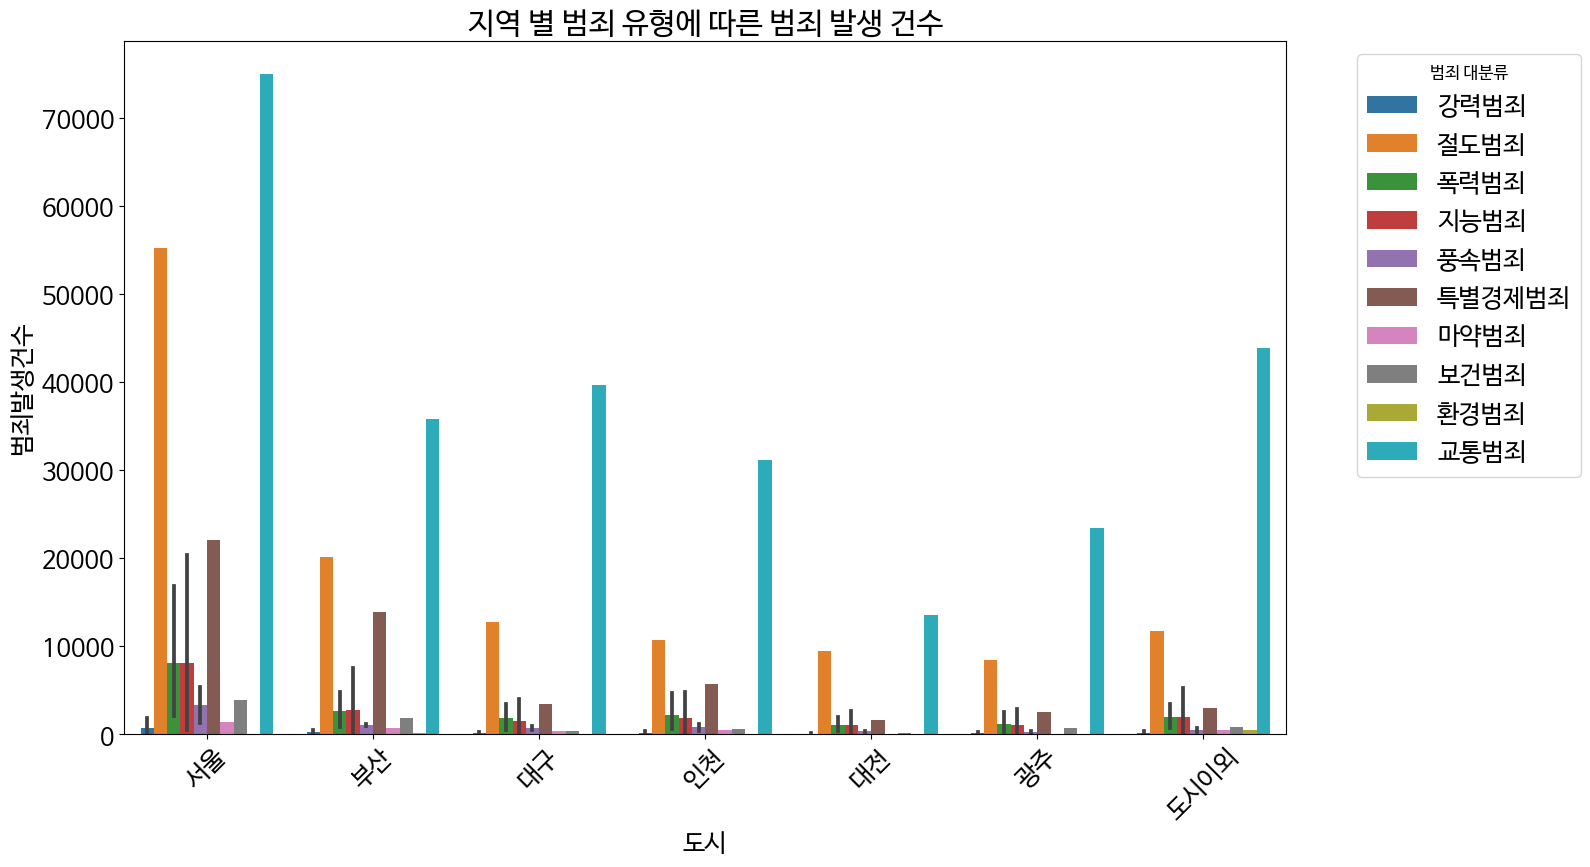

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 불러오기
crime_data = pd.read_csv('범죄_지역별_통계.csv', encoding='euc-kr')

# 데이터 재구조화 (열을 '도시' 열로 변경)
crime_data_melted = crime_data.melt(id_vars=['범죄대분류', '범죄중분류'], var_name='도시', value_name='범죄발생건수')

# 그래프 생성 (각 지역별로 바 차트 생성)
plt.figure(figsize=(15, 9))
sns.barplot(data=crime_data_melted, x='도시', y='범죄발생건수', hue='범죄대분류')
plt.title('지역 별 범죄 유형에 따른 범죄 발생 건수')
plt.xticks(rotation=45)  # x축 레이블 회전

plt.legend(title='범죄 대분류', title_fontsize='12', loc='upper left', bbox_to_anchor=(1.05, 1))

plt.show()

  범죄대분류  범죄중분류   서울   부산   대구   인천   대전   광주  도시이외
0  강력범죄   살인기수   67   20   13   17    8   11    30
1  강력범죄  살인미수등   96   41   23   34   16    7    44
2  강력범죄     강도  274  161   60  103   64   44    65
3  강력범죄     강간  969  383  216  304  181  216   328
4  강력범죄   유사강간  118   24   21   35   14   17    33


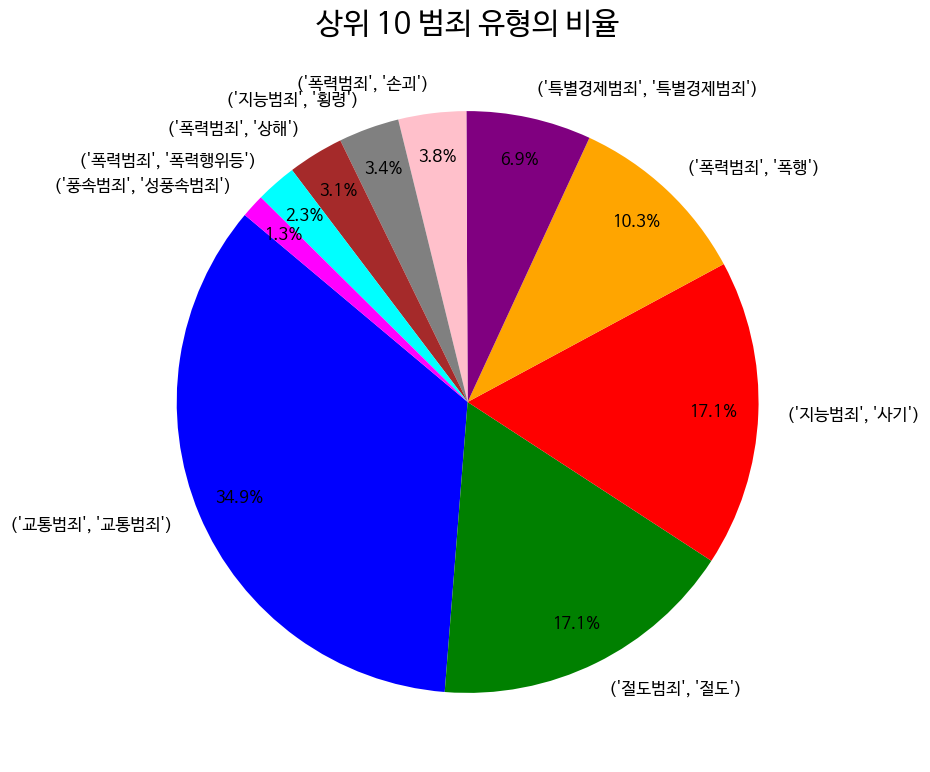

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 불러오기
crime_data = pd.read_csv('범죄_지역별_통계.csv', encoding='euc-kr')

# 데이터 확인
print(crime_data.head())

# 범죄 유형 별로 발생 건수 합계 계산
crime_data_grouped = crime_data.groupby(['범죄대분류', '범죄중분류']).sum().sum(axis=1)

# 상위 N개 범죄 유형만 선택
top_n = 10
crime_data_grouped = crime_data_grouped.nlargest(top_n)

# 텍스트 크기 조절
textprops = {'fontsize': 12}  # 텍스트 크기를 12pt로 설정
colors = ['blue', 'green', 'red', 'orange', 'purple', 'pink', 'gray', 'brown', 'cyan', 'magenta']
pctdistance = 0.85  # 백분율 레이블의 위치를 조절하여 텍스트 간격을 늘립니다.
plt.figure(figsize=(8, 8))
plt.pie(crime_data_grouped, labels=crime_data_grouped.index, autopct='%1.1f%%', startangle=140, textprops=textprops, colors=colors, pctdistance=pctdistance)
plt.title(f'상위 {top_n} 범죄 유형의 비율')
plt.axis('equal')  # 원 그래프를 원형으로 유지
plt.subplots_adjust(left=0.1, right=0.9, top=1.0, bottom=0.1)
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

crime_data = pd.read_csv('범죄_검거_기간.csv', encoding='euc-kr')

# 데이터 확인
print(crime_data.head())

  범죄대분류  범죄중분류  1일이내  2일이내  3일이내  10일이내  1개월이내  3개월이내  6개월이내  1년이내  1년초과
0  강력범죄   살인기수   185     5     8     11     10     11     14     9    12
1  강력범죄  살인미수등   319     5     4     15     20     20     11     7    15
2  강력범죄     강도   249    21    12     51     58     58     23    11    24
3  강력범죄     강간   668    36    43    230    855   1709    708   387   515
4  강력범죄   유사강간   113     2     8     35    180    325    109    45    77


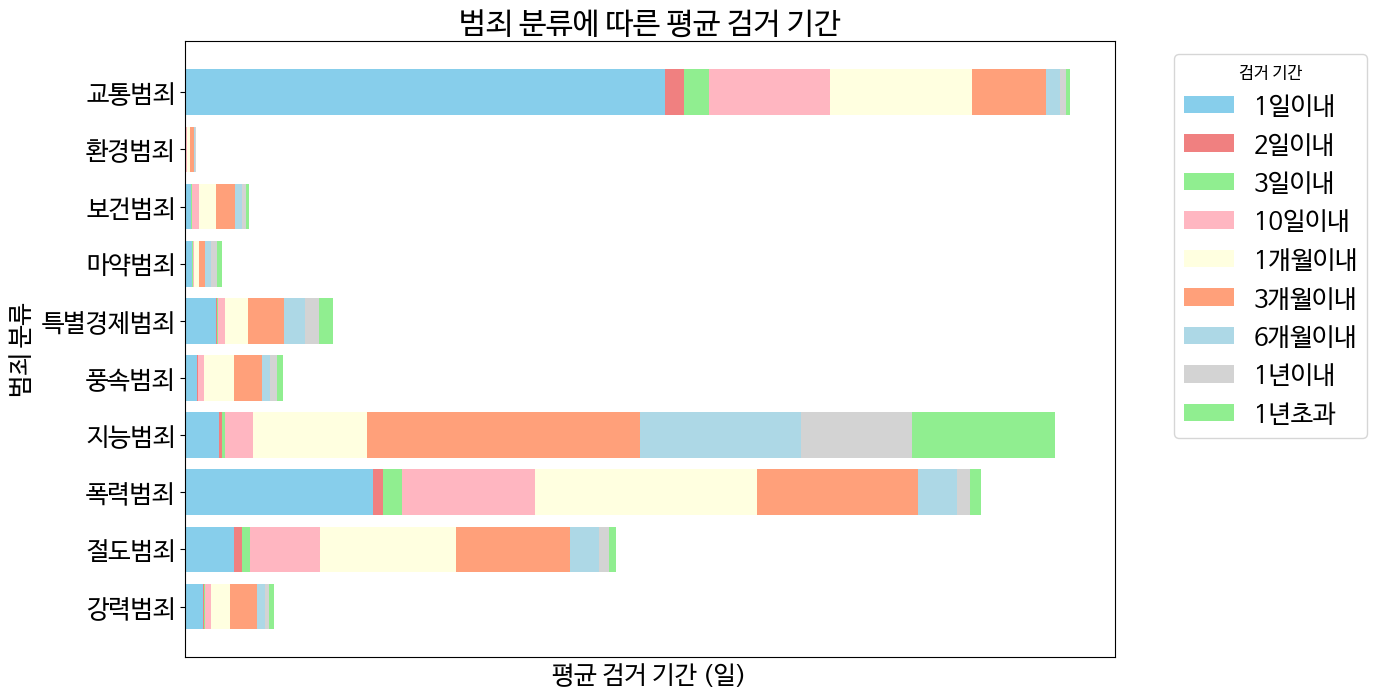

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 불러오기
crime_duration_data = pd.read_csv('범죄_검거_기간.csv', encoding='euc-kr')

# '검거 기간' 열 추가
crime_duration_data['검거 기간'] = crime_duration_data[['1일이내', '2일이내', '3일이내', '10일이내', '1개월이내', '3개월이내', '6개월이내', '1년이내', '1년초과']].mean(axis=1)

# 가로로 Bar chart 그리기
plt.figure(figsize=(12, 8))
plt.barh(crime_duration_data['범죄분류'], crime_duration_data['1일이내'], label='1일이내', color='skyblue')
plt.barh(crime_duration_data['범죄분류'], crime_duration_data['2일이내'], label='2일이내', color='lightcoral', left=crime_duration_data['1일이내'])
plt.barh(crime_duration_data['범죄분류'], crime_duration_data['3일이내'], label='3일이내', color='lightgreen', left=crime_duration_data['1일이내'] + crime_duration_data['2일이내'])
plt.barh(crime_duration_data['범죄분류'], crime_duration_data['10일이내'], label='10일이내', color='lightpink', left=crime_duration_data['1일이내'] + crime_duration_data['2일이내'] + crime_duration_data['3일이내'])
plt.barh(crime_duration_data['범죄분류'], crime_duration_data['1개월이내'], label='1개월이내', color='lightyellow', left=crime_duration_data['1일이내'] + crime_duration_data['2일이내'] + crime_duration_data['3일이내'] + crime_duration_data['10일이내'])
plt.barh(crime_duration_data['범죄분류'], crime_duration_data['3개월이내'], label='3개월이내', color='lightsalmon', left=crime_duration_data['1일이내'] + crime_duration_data['2일이내'] + crime_duration_data['3일이내'] + crime_duration_data['10일이내'] + crime_duration_data['1개월이내'])
plt.barh(crime_duration_data['범죄분류'], crime_duration_data['6개월이내'], label='6개월이내', color='lightblue', left=crime_duration_data['1일이내'] + crime_duration_data['2일이내'] + crime_duration_data['3일이내'] + crime_duration_data['10일이내'] + crime_duration_data['1개월이내'] + crime_duration_data['3개월이내'])
plt.barh(crime_duration_data['범죄분류'], crime_duration_data['1년이내'], label='1년이내', color='lightgrey', left=crime_duration_data['1일이내'] + crime_duration_data['2일이내'] + crime_duration_data['3일이내'] + crime_duration_data['10일이내'] + crime_duration_data['1개월이내'] + crime_duration_data['3개월이내'] + crime_duration_data['6개월이내'])
plt.barh(crime_duration_data['범죄분류'], crime_duration_data['1년초과'], label='1년초과', color='lightgreen', left=crime_duration_data['1일이내'] + crime_duration_data['2일이내'] + crime_duration_data['3일이내'] + crime_duration_data['10일이내'] + crime_duration_data['1개월이내'] + crime_duration_data['3개월이내'] + crime_duration_data['6개월이내'] + crime_duration_data['1년이내'])

plt.xlabel('평균 검거 기간 (일)')
plt.ylabel('범죄 분류')
plt.title('범죄 분류에 따른 평균 검거 기간')

# 범례 추가
plt.legend(title='검거 기간', title_fontsize='12', loc='upper left', bbox_to_anchor=(1.05, 1))

plt.xticks([])

plt.show()
